In [1]:
import matplotlib.pyplot as plt
from pennylane.drawer import MPLDrawer
from ohqk.project_directories import GRAPHICS_DIR

Draw the schematic of a quantum circuit

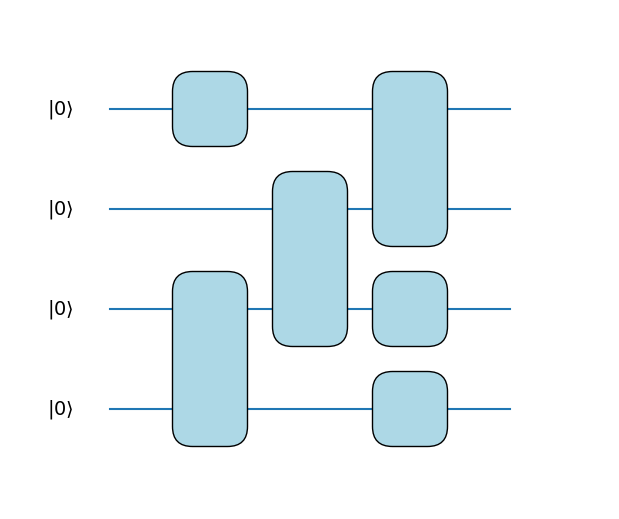

In [2]:
n_wires = 4
n_layers = 3

drawer = MPLDrawer(n_wires=n_wires, n_layers=n_layers)
drawer.label([r"$|0\rangle$"] * n_wires)
drawer.box_gate(layer=0, wires=0, box_options={ 'facecolor': 'lightblue' })
drawer.box_gate(layer=0, wires=[2, 3], box_options={ 'facecolor': 'lightblue' })
drawer.box_gate(layer=1, wires=[1, 2], box_options={ 'facecolor': 'lightblue' })
drawer.box_gate(layer=2, wires=[0, 1], box_options={ 'facecolor': 'lightblue'})
drawer.box_gate(layer=2, wires=[2], box_options={ 'facecolor': 'lightblue' })
drawer.box_gate(layer=2, wires=[3], box_options={ 'facecolor': 'lightblue' })

plt.savefig(GRAPHICS_DIR / "embedding_generic.pdf")

Draw the QEK embedding

In [3]:
plt.rcParams['patch.facecolor'] = 'white'
plt.rcParams['patch.edgecolor'] = 'black'
plt.rcParams['text.color'] = 'black'
plt.rcParams['patch.linewidth'] = 2
plt.rcParams['lines.color'] = 'black'
plt.rcParams['lines.linewidth'] = 2

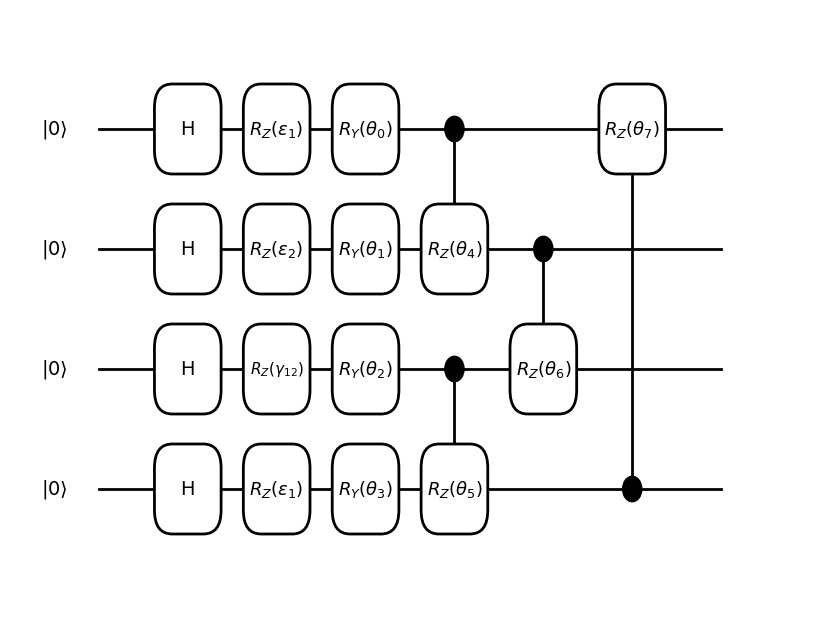

In [4]:
n_wires = 4
n_layers = 6

drawer = MPLDrawer(n_wires=n_wires, n_layers=n_layers, figsize=(8, 6))
drawer.label([r"$|0\rangle$"] * n_wires)

# Hadamards for all qubits in the first layer
for i in range(n_wires):
    drawer.box_gate(layer=0, wires=i, text="H")

# RZ gates, data encoding for all qubits in the second layer
drawer.box_gate(layer=1, wires=0, text=r"$R_Z(\varepsilon_{1})$")
drawer.box_gate(layer=1, wires=1, text=r"$R_Z(\varepsilon_{2})$")
drawer.box_gate(layer=1, wires=2, text=r"$R_Z(\gamma_{12})$")
drawer.box_gate(layer=1, wires=3, text=r"$R_Z(\varepsilon_{1})$")

# RY gates, variational circuit for all qubits in the third layer
for i in range(n_wires):
    drawer.box_gate(layer=2, wires=i, text=rf"$R_Y(\theta_{i})$")

# controlled RZ gates for the entangling layer
def crz(wires, layer, theta):
    drawer.ctrl(layer=layer, wires=wires)
    drawer.box_gate(layer=layer, wires=wires[1], text=rf"$R_Z(\theta_{theta})$", box_options={"zorder": 4}, text_options={"zorder": 5})

crz([0, 1], 3, 4)
crz([2, 3], 3, 5)
crz([1, 2], 4, 6)
crz([3, 0], 5, 7)

plt.savefig(GRAPHICS_DIR / "qek_embedding.pdf")

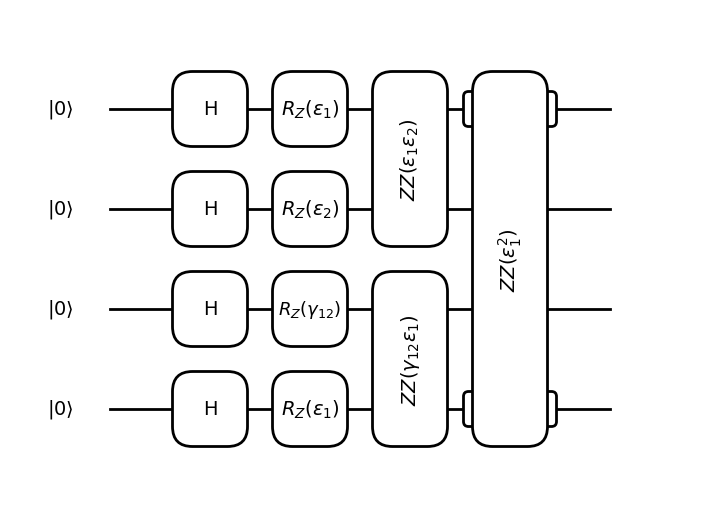

In [5]:
n_wires = 4
n_layers = 4

drawer = MPLDrawer(n_wires=n_wires, n_layers=n_layers)
drawer.label([r"$|0\rangle$"] * n_wires)

# Hadamards for all qubits in the first layer
for i in range(n_wires):
    drawer.box_gate(layer=0, wires=i, text="H")

# RZ gates, data encoding for all qubits in the second layer
drawer.box_gate(layer=1, wires=0, text=r"$R_Z(\varepsilon_{1})$")
drawer.box_gate(layer=1, wires=1, text=r"$R_Z(\varepsilon_{2})$")
drawer.box_gate(layer=1, wires=2, text=r"$R_Z(\gamma_{12})$")
drawer.box_gate(layer=1, wires=3, text=r"$R_Z(\varepsilon_{1})$")

# ZZ gates of features products in a nearest-neighbor fashion
drawer.box_gate(layer=2, wires=[0, 1], text=r"$ZZ(\varepsilon_{1}\varepsilon_{2})$")    
drawer.box_gate(layer=2, wires=[2, 3], text=r"$ZZ(\gamma_{12}\varepsilon_{1})$")
drawer.box_gate(layer=3, wires=[0, 3], text=r"$ZZ(\varepsilon_{1}^2)$", text_options={"rotation": 90})

plt.savefig(GRAPHICS_DIR / "iqp_embedding.pdf")